In [53]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('..')
from common.base import session

My first attempt was to manipulate the data using shift and group by thinking the distance was calculated between the starting Longitude and Latitude. The data suggests that per second a new reading was being added on a transactional basis. 

I notied longitude wasn't changing, I mapped the points on a Map and saw that it was a straight line of travel.

I used a geopy distance module to calculate the difference between 2 coordinates.

In [54]:
data = session.execute('''SELECT trip_id,make,model,trip_duration_minutes,distance FROM daily_trip_long_lat_calc;''').all()
session.rollback()
df = pd.DataFrame(data, columns=['trip_id','make','model','trip_duration_minutes','distance_travelled'])
df = df.groupby(['trip_id','make','model']).sum()

In [55]:

df['trip_duration_minutes'] = df['trip_duration_minutes'].round(2)
df['distance_travelled'] = df['distance_travelled'].round(2)
df.head()

,,,trip_duration_minutes,distance_travelled
trip_id,make,model,,
00922df3be5a4589ab385d0c2da2dd81,Audi,Q3,48.28,76.20
01b8a24510cd4e4684d67b96369286e0,BMW,3 Series GT,10.50,16.92
0244f7bc747b41fba6fcd75444736621,Jeep,Compass,9.12,16.84
02c51e56cc484711b218d3d01196687a,Audi,Q3,98.43,181.91
039c14a9a7df4096bb6e9445136fdf77,Hyundai,Creta,121.07,223.71


In [56]:
session.rollback()

In [57]:
data = session.execute('''SELECT * FROM daily_trip_long_lat_calc WHERE trip_id ='00922df3be5a4589ab385d0c2da2dd81';''').all()
df = pd.DataFrame(data, columns=['index','Datetime','trip_id','make','model','lat','long','velocity','next_lat','next_long','timestamp_end','trip_duration_minutes','distance'])
df = df[['Datetime','trip_id','velocity']]

In [59]:
df['velocity'] = df['velocity'].astype(float)

<AxesSubplot:xlabel='Datetime'>

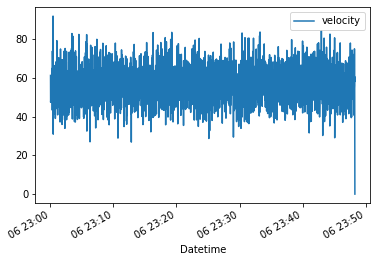

In [61]:
df.plot.line(x='Datetime',y='velocity')


My next step was to get the average velocity over the Trip ID, then calculate distance travelled based on the time. My concern is that per second, it appears there is quite a big difference in the velocity reading, for example going from 92 to 20. There is also a 0 in the data column. 

Appears to be more realistic but this second method would be my best approach.

In [5]:
data = session.execute('''SELECT * FROM daily_trip_velocity_calc;''').all()
df = pd.DataFrame(data,columns=['index','trip_id','make','model','trip_duration_minutes','average_velocity','distance_travelled'])
df.head()

,index,trip_id,make,model,trip_duration_minutes,average_velocity,distance_travelled
0,0,00922df3be5a4589ab385d0c2da2dd81,Audi,Q3,48.0,56.998002,45.598402
1,1,01b8a24510cd4e4684d67b96369286e0,BMW,3 Series GT,10.0,65.705864,10.950977
2,2,0244f7bc747b41fba6fcd75444736621,Jeep,Compass,9.0,65.921204,9.888181
3,3,02c51e56cc484711b218d3d01196687a,Audi,Q3,98.0,53.970758,88.152239
4,4,039c14a9a7df4096bb6e9445136fdf77,Hyundai,Creta,121.0,65.797894,132.692420
